In [ ]:
import matplotlib.pyplot as plt
from prody import *

# Load the protein structures
protein1 = parsePDB('5uh5.pdb')
protein2 = parsePDB('6c04_woRbpA.pdb')

# Get the common chain IDs between protein1 and protein2
common_chains = list(set(protein1.getChids()) & set(protein2.getChids()))

# Calculate the C-alpha deviations for the same chain IDs
deviation_values = {}
for chain_id in common_chains:
    # Select C-alpha atoms for the current chain in both proteins
    calphas_chain1 = protein1.select(f'chain {chain_id} and name CA')
    calphas_chain2 = protein2.select(f'chain {chain_id} and name CA')

    # Calculate the C-alpha deviations for the current chain
    deviations = getDeviations(calphas_chain1, calphas_chain2)
    deviation_values[chain_id] = deviations

# Plotting the C-alpha deviations for each chain
fig, ax = plt.subplots()

for chain_id, deviations_chain in deviation_values.items():
    ax.plot(deviations_chain, label=f'Chain {chain_id}')

ax.set_xlabel('Residue')
ax.set_ylabel('C-alpha Deviation (Å)')
ax.set_title('C-alpha Deviation for Same Chain IDs')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from prody import parsePDB

# Load the protein structures
protein1 = parsePDB('5uh5.pdb')
protein2 = parsePDB('6c04_woRbpA.pdb')

# Get the common chain IDs between protein1 and protein2
common_chains = list(set(protein1.getChids()) & set(protein2.getChids()))

# Calculate the C-alpha deviations for the same chain IDs
deviation_values = {}
for chain_id in common_chains:
    # Select C-alpha atoms for the current chain in both proteins
    calphas_chain1 = protein1.select(f'chain {chain_id} and name CA')
    calphas_chain2 = protein2.select(f'chain {chain_id} and name CA')

    # Calculate the C-alpha deviations for the current chain
    deviations = calphas_chain1.getCoords() - calphas_chain2.getCoords()
    deviation_values[chain_id] = deviations

# Plotting the C-alpha deviations for each chain
fig, ax = plt.subplots()

for chain_id, deviations_chain in deviation_values.items():
    ax.plot(deviations_chain, label=f'Chain {chain_id}')

    ax.set_xlabel('Residue')
    ax.set_ylabel('C-alpha Deviation (Å)')
    ax.set_title('C-alpha Deviation for Same Chain IDs')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from prody import parsePDB, select
import numpy as np

# Load the protein structures
protein1 = parsePDB('5uh5.pdb')
protein2 = parsePDB('6c04_woRbpA.pdb')

# Get the common chain IDs between protein1 and protein2
common_chains = list(set(protein1.getChids()) & set(protein2.getChids()))

# Plotting the C-alpha deviations for each chain
for chain_id in common_chains:
    # Select C-alpha atoms for the current chain in both proteins
    calphas_chain1 = protein1.select(f'chain {chain_id} and name CA')
    calphas_chain2 = protein2.select(f'chain {chain_id} and name CA')

    # Calculate the C-alpha deviations for the current chain
    deviations = calphas_chain1.getCoords() - calphas_chain2.getCoords()
    dev = sqrt(deviations[0]^2+deviations[1]^2+deviations[2]^2)

    # Get the residue numbers for the current chain
    residue_numbers = calphas_chain1.getResnums()

    # Plotting the C-alpha deviations for the current chain
    fig, ax = plt.subplots()
    ax.plot(residue_numbers, dev)
    ax.set_xlabel('Residue')
    ax.set_ylabel('C-alpha Deviation (Å)')
    ax.set_title(f'C-alpha Deviation for Chain {chain_id}')
    plt.tight_layout()
    plt.show()


In [ ]:
deviations

In [ ]:
import matplotlib.pyplot as plt
from prody import parsePDB, select
import numpy as np

# Load the protein structures
protein1 = parsePDB('5uh5.pdb')
protein2 = parsePDB('6c04_woRbpA.pdb')

# Get the common chain IDs between protein1 and protein2
common_chains = list(set(protein1.getChids()) & set(protein2.getChids()))

# Plotting the C-alpha deviations for each chain
for chain_id in common_chains:
    # Select C-alpha atoms for the current chain in both proteins
    calphas_chain1 = protein1.select(f'chain {chain_id} and name CA')
    calphas_chain2 = protein2.select(f'chain {chain_id} and name CA')

    # Calculate the C-alpha deviations for the current chain
    deviations = calphas_chain1.getCoords() - calphas_chain2.getCoords()
    dev = np.sqrt(np.sum(deviations ** 2, axis=1))

    # Get the residue numbers for the current chain
    residue_numbers = calphas_chain1.getResnums()
    print(residue_numbers)

    # Plotting the C-alpha deviations for the current chain
    fig, ax = plt.subplots()
    ax.plot(residue_numbers, dev*0.1)
    ax.set_xlabel('Residue')
    ax.set_ylabel('C-alpha Deviation (Å)')
    ax.set_title(f'C-alpha Deviation for Chain {chain_id}')
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Read the RMSD data from the text file
residue_numbers = []
rmsd_values = []
#with open('/home/sneha/work/RnaP/md/MD_nma/chain_A.txt', 'r') as file:
import pandas as pd

# Read the data from the text file into a DataFrame
df = pd.read_csv('chain_A.txt', sep='\t', header=0)

# Plotting the C-alpha RMSD values
fig, ax = plt.subplots()
ax.plot(df['ca'], df['RMSD'])
ax.set_xlabel('C-alpha')
ax.set_ylabel('C-alpha RMSD (Å)')
ax.set_title('C-alpha RMSD')
plt.tight_layout()
plt.show()



In [ ]:
from Bio import PDB

def get_residue_numbers(structure):
    residue_numbers = {}

    for model in structure:
        for chain in model:
            chain_id = chain.id
            residues = chain.get_residues()
            residue_numbers[chain_id] = [res.id[1] for res in residues]

    return residue_numbers

# Load the PDB file
parser = PDB.PDBParser()
structure = parser.get_structure("structure", "5uh5.pdb")

# Get residue numbers for each chain
residue_numbers = get_residue_numbers(structure)

# Print residue numbers for each chain
for chain_id, numbers in residue_numbers.items():
    print(f"Chain {chain_id}: {numbers}")


In [ ]:
residue_numbers['F']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data from the text file into a DataFrame
df = pd.read_csv('chain_F.txt', sep='\t', header=0)

# Convert 'ca' and 'RMSD' columns to numpy arrays
ca = df['ca'].to_numpy()
ca2 = np.array(residue_numbers['F'])
print(len(ca2),len(rmsd))
rmsd = df['RMSD'].to_numpy()

# Plotting the C-alpha RMSD values
fig, ax = plt.subplots()
ax.plot(ca2, rmsd)
ax.plot(ca2, rmsd, color='purple', linewidth=2)
ax.fill_between(ca2, rmsd, color='thistle')
ax.set_xlabel('Residue no.')
ax.set_ylabel('C-alpha RMSD (Å)')
ax.set_title('C-alpha RMSD')
ax.set_xlim(min(ca2), max(ca2))
ax.set_ylim(min(rmsd))
plt.tight_layout()
#plt.savefig('CA_chainF.png',dpi = 1600)
plt.show()


In [ ]:
def getDeviations(self):
        """Returns deviations from the ensemble reference coordinates.
        Deviations are calculated for (selected) atoms."""

        ensemble = self._ensemble
        if ensemble._confs is None:
            return None
        indices = ensemble._indices
        if indices is None:
            return ensemble._confs[self._index] - ensemble._coords
        else:
            return (ensemble._confs[self._index, indices].copy() -
                    ensemble._coords[indices])

In [ ]:
import prody as pd

def get_calpha_deviations(structure1, structure2):
    # Get the C-alpha atoms from each structure
    ca_atoms1 = structure1.select("name CA")
    ca_atoms2 = structure2.select("name CA")

    # Calculate the C-alpha deviations
    deviations = ca_atoms2.getDeviations(ca_atoms1)

    return deviations

# Read the PDB files
pdb1 = pd.parsePDB("5uh5.pdb")
pdb2 = pd.parsePDB("6c04.pdb")

# Calculate the C-alpha deviations
deviations = get_calpha_deviations(pdb1, pdb2)

# Print the deviations
print(deviations)



In [9]:
import prody as pd
import numpy as np

def align_and_subtract_coordinates(structure1, structure2):
    # Get the C-alpha atoms from each structure
    ca_atoms1 = structure1.select("name CA")
    ca_atoms2 = structure2.select("name CA")

    # Align the two sets of C-alpha atoms
    pd.superpose(ca_atoms2, ca_atoms1)

    # Get the coordinates of the C-alpha atoms
    coords1 = ca_atoms1.getCoords()
    coords2 = ca_atoms2.getCoords()

    # Subtract coordinates of structure1 from structure2
    subtracted_coords = coords2 - coords1

    # Group the subtracted coordinates chain-wise
    chains1 = structure1.getChids()
    subtracted_coords_chainwise = {}
    for chain_id in chains1:
        chain_ca_atoms2 = subtracted_coords[ca_atoms1.getChids() == chain_id]
        subtracted_coords_chainwise[chain_id] = chain_ca_atoms2

    return subtracted_coords_chainwise

# Read the PDB files
structure1 = pd.parsePDB("5uh5.pdb")
structure2 = pd.parsePDB("6c04_woRbpA.pdb")

# Align the structures, subtract coordinates, and get chainwise difference
chainwise_difference = align_and_subtract_coordinates(structure1, structure2)

# Print the chainwise coordinates difference
for chain_id, coords_diff in chainwise_difference.items():
    print(f"Chain {chain_id}:")
    print(coords_diff)


@> 50719 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 50717 atoms and 1 coordinate set(s) were parsed in 0.33s.


Chain A:
[[-2.98115708e+00 -5.02635534e+00 -8.68782962e-02]
 [-6.70856322e-01 -6.59985811e+00  1.60483526e-01]
 [-3.08025662e+00 -4.02437312e+00 -1.55490996e-01]
 [-9.39630811e-01 -4.10669946e+00 -2.50436537e+00]
 [-1.31792795e+00  5.47615365e-01 -2.45256386e+00]
 [-2.93785278e+00 -1.89310850e+00  2.22467687e-01]
 [-1.73769353e+00 -1.36774092e+00 -2.69719228e+00]
 [-2.81706634e+00 -2.08348419e-02  6.38059817e-01]
 [-2.24616405e+00 -7.67930014e-01 -2.35893845e+00]
 [-2.40656334e+00  7.31566181e-01  4.04837519e-01]
 [-2.00531719e+00 -2.33413524e+00 -1.64123994e+00]
 [-7.74939893e-01  1.76650687e+00 -8.84767490e-01]
 [-1.14354368e+00 -1.32873274e+00 -7.55231730e-01]
 [ 4.57567486e-01 -2.61093553e+00  8.49828456e-02]
 [ 8.88669022e-01 -2.34491934e+00  6.79406579e-01]
 [ 7.75378429e-02 -1.01610415e+00  1.06302969e+00]
 [ 6.04034609e-03 -1.21549855e+00  1.09391681e+00]
 [ 1.95068110e-01 -1.26414885e+00  7.43024974e-01]
 [ 4.64646510e-01 -8.43146937e-01  9.53012140e-01]
 [ 5.43182211e-01 -7.7

In [10]:
import prody as pd
import numpy as np

def align_and_subtract_coordinates(structure1, structure2):
    # Get the C-alpha atoms from each structure
    ca_atoms1 = structure1.select("name CA")
    ca_atoms2 = structure2.select("name CA")

    # Align the two sets of C-alpha atoms
    pd.superpose(ca_atoms2, ca_atoms1)

    # Get the coordinates of the C-alpha atoms
    coords1 = ca_atoms1.getCoords()
    coords2 = ca_atoms2.getCoords()

    # Subtract coordinates of structure1 from structure2
    subtracted_coords = coords2 - coords1

    # Calculate the RMSD for each C-alpha atom
    rmsd = np.sqrt(np.sum(np.square(subtracted_coords), axis=1) / len(coords1))

    # Group the RMSD values chain-wise
    chains1 = structure1.getChids()
    rmsd_chainwise = {}
    for chain_id in chains1:
        chain_rmsd = rmsd[ca_atoms1.getChids() == chain_id]
        rmsd_chainwise[chain_id] = chain_rmsd

    return rmsd_chainwise

# Read the PDB files
pdb1 = pd.parsePDB("5uh5.pdb")
pdb2 = pd.parsePDB("6c04_woRbpA.pdb")

# Calculate the aligned and subtracted coordinates chain-wise
rmsd_values = align_and_subtract_coordinates(pdb1, pdb2)

# Print the RMSD values chain-wise
for chain_id, rmsd in rmsd_values.items():
    print(f"Chain {chain_id}:")
    print(rmsd)
    print()


@> 50719 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 50717 atoms and 1 coordinate set(s) were parsed in 0.33s.


Chain A:
[0.10266293 0.11656125 0.08906199 0.08608839 0.04984359 0.0615152
 0.06126593 0.0507379  0.05878425 0.04475112 0.06126093 0.03727816
 0.03352939 0.04658526 0.04563641 0.02586672 0.02872444 0.02598394
 0.02379477 0.02351073 0.0217825  0.03029177 0.02842785 0.01775974
 0.02538707 0.0232981  0.01844265 0.02271326 0.02553137 0.02763086
 0.03119667 0.027198   0.01387945 0.02863168 0.02873196 0.02745566
 0.02774124 0.0217885  0.02287883 0.01901085 0.01726385 0.01338618
 0.00954911 0.01495912 0.0099576  0.00999862 0.0136726  0.01340123
 0.01520957 0.01265982 0.00943816 0.01156458 0.00731296 0.00634298
 0.0215862  0.01546372 0.00829676 0.0073302  0.01094424 0.01327386
 0.00449468 0.0087884  0.00868378 0.00961324 0.01105064 0.01801546
 0.02053633 0.01595857 0.02052943 0.01056508 0.01303222 0.01155144
 0.01413059 0.01347466 0.01214792 0.01977073 0.02698017 0.02121363
 0.02061364 0.01324751 0.01470927 0.01600679 0.02015077 0.01578188
 0.01566282 0.01648098 0.01766593 0.0286666  0.0226351

@> 50719 atoms and 1 coordinate set(s) were parsed in 0.29s.
@> 50717 atoms and 1 coordinate set(s) were parsed in 0.33s.


Chain A:


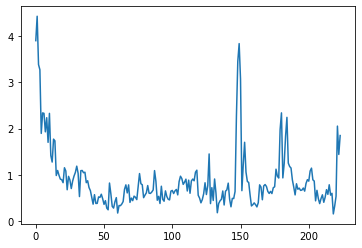


Chain B:


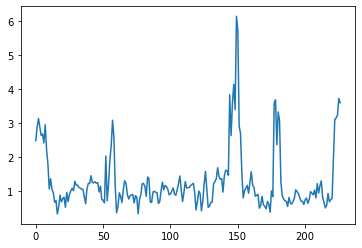


Chain C:


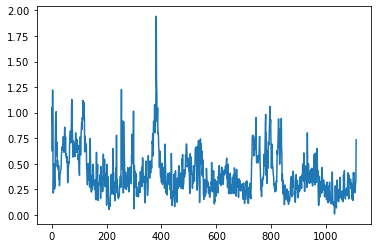


Chain D:


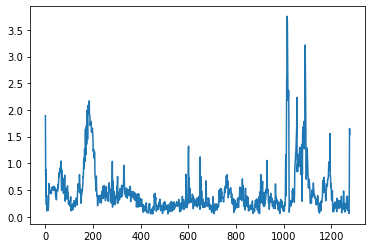


Chain E:


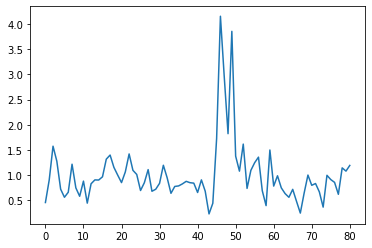


Chain F:


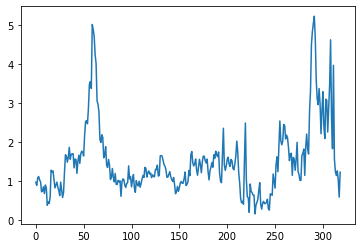

In [14]:
import prody as pd
import numpy as np
import matplotlib.pyplot as plt

def align_and_subtract_coordinates(structure1, structure2):
    # Get the C-alpha atoms from each structure
    ca_atoms1 = structure1.select("name CA")
    ca_atoms2 = structure2.select("name CA")

    # Align the two sets of C-alpha atoms
    pd.superpose(ca_atoms2, ca_atoms1)

    # Get the coordinates of the C-alpha atoms
    coords1 = ca_atoms1.getCoords()
    coords2 = ca_atoms2.getCoords()

    # Subtract coordinates of structure1 from structure2
    subtracted_coords = coords2 - coords1

    # Calculate the RMSD for each C-alpha atom within each chain
    chains1 = structure1.getChids()
    rmsd_chainwise = {}
    for chain_id in chains1:
        chain_ca_atoms1 = ca_atoms1.select(f"chain {chain_id}")
        chain_ca_atoms2 = ca_atoms2.select(f"chain {chain_id}")
        chain_subtracted_coords = chain_ca_atoms2.getCoords() - chain_ca_atoms1.getCoords()
        chain_rmsd = np.sqrt(np.sum(np.square(chain_subtracted_coords), axis=1) / len(chain_ca_atoms1))
        rmsd_chainwise[chain_id] = chain_rmsd

    return rmsd_chainwise

# Read the PDB files
pdb1 = pd.parsePDB("5uh5.pdb")
pdb2 = pd.parsePDB("6c04_woRbpA.pdb")

# Calculate the aligned and subtracted coordinates chain-wise
rmsd_values = align_and_subtract_coordinates(pdb1, pdb2)

# Print the RMSD values chain-wise
for chain_id, rmsd in rmsd_values.items():
    print(f"Chain {chain_id}:")
    plt.plot(rmsd*10)
    plt.show()
    #print(rmsd)
    print()


@> 50719 atoms and 1 coordinate set(s) were parsed in 0.29s.


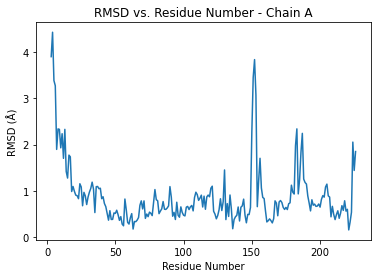

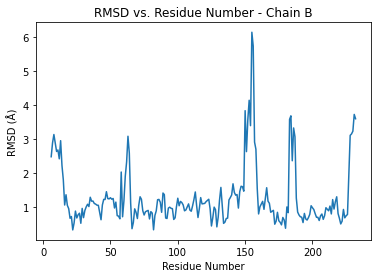

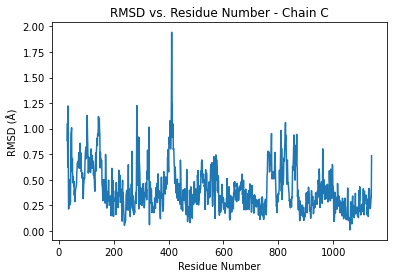

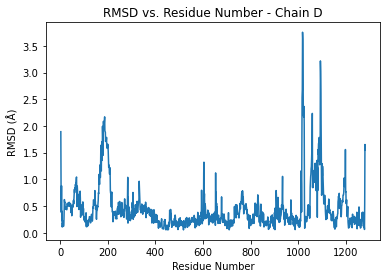

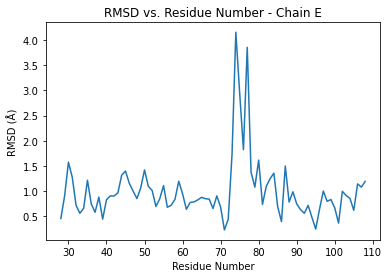

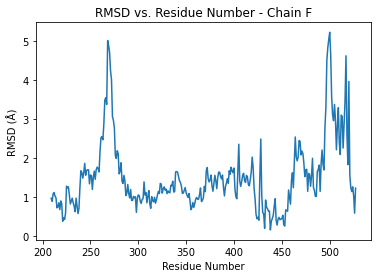

In [23]:
pdb1 = pd.parsePDB("5uh5.pdb")

for chain_id, rmsd in rmsd_values.items():
    residue_numbers = np.unique(pdb1.select(f"chain {chain_id}").getResnums())  # Get unique residue numbers
    plt.plot(residue_numbers, rmsd*10)  # Multiply by 10 for better visualization
    plt.xlabel("Residue Number")
    plt.ylabel("RMSD (Å)")
    plt.title(f"RMSD vs. Residue Number - Chain {chain_id}")
    plt.show()

In [22]:
pdb1.select("chain A").getResnums()

array([  3,   3,   3, ..., 226, 226, 226])